AULA 06 - 16/09/2024

In [27]:
#Bibliotecas

import numpy as np
import pandas as pd
import seaborn as sbn
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_auc_score, roc_curve, classification_report,
                            accuracy_score, confusion_matrix, auc)

Lendo a base

In [2]:
df = pd.read_csv('tratores.csv', delimiter=',', decimal='.')

Visualisando a base

In [3]:
df.head()

consumidor  rendimento  tamanho.lote  criacao.gado
0           0        33.0          18.8             1
1           0        43.2          20.4             1
2           0        47.4          16.4             1
3           0        49.2          17.6             0
4           1        51.0          22.0             1

Removendo espaços em branco no nome das colunas

In [4]:
df.columns = df.columns.str.strip()

Plotando gráfico de dispersão entre as variáveis de interesse

<Axes: xlabel='tamanho.lote', ylabel='consumidor'>

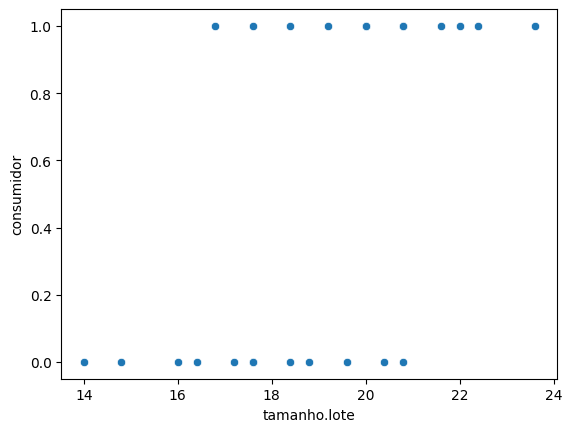

In [ ]:
sbn.scatterplot(x = 'tamanho.lote', y = 'consumidor', data = df)

In [ ]:
df.columns

Index(['consumidor', 'rendimento', 'tamanho.lote', 'criacao.gado'], dtype='object')

Vendo o tamnho do lote vs consumidor

<Axes: xlabel='consumidor', ylabel='tamanho.lote'>

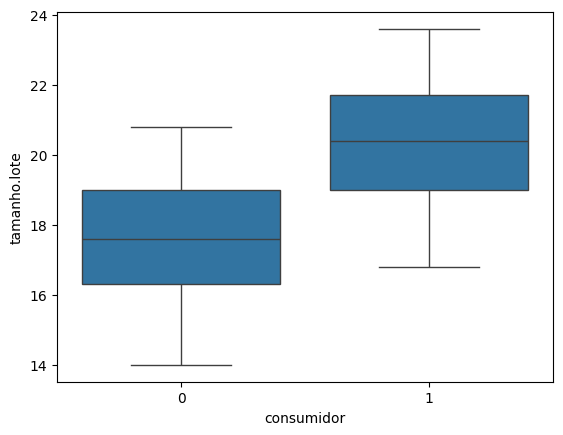

In [ ]:
sbn.boxplot(y = 'tamanho.lote', x = 'consumidor', data = df)

<Axes: xlabel='consumidor', ylabel='rendimento'>

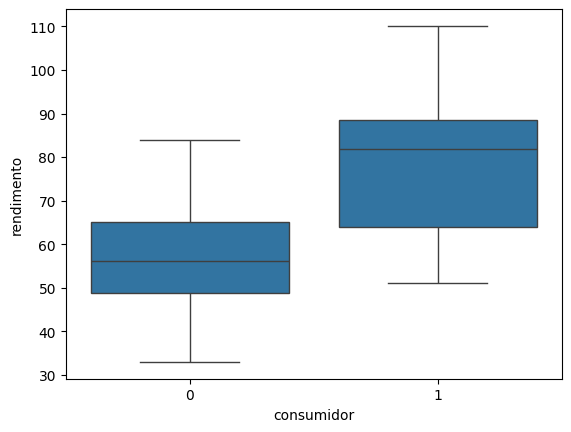

In [ ]:
sbn.boxplot(y = 'rendimento', x = 'consumidor', data = df)

**Modelo de Regressão Logística**

In [6]:
features = ['rendimento', 'tamanho.lote', 'criacao.gado']

In [7]:
# Separar variável resposta de explicativas

y = df['consumidor']
X = df[features]

**Construindo o modelo**

In [9]:
# Construindo o modelo de árvore
modelo = DecisionTreeClassifier()
modelo = modelo.fit(X, y)


[Text(0.5, 0.9, 'rendimento <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.25, 0.7, 'tamanho.lote <= 21.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.7, 'tamanho.lote <= 19.8\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.625, 0.5, 'rendimento <= 84.75\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.5, 0.3, 'rendimento <= 61.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

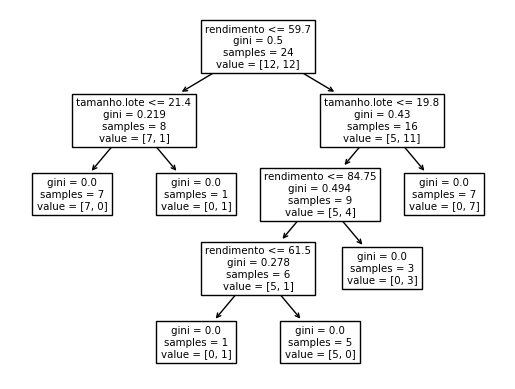

In [12]:
#Plotando a árvore
tree.plot_tree(modelo, feature_names=features)

**Achando as features importance**

<Axes: >

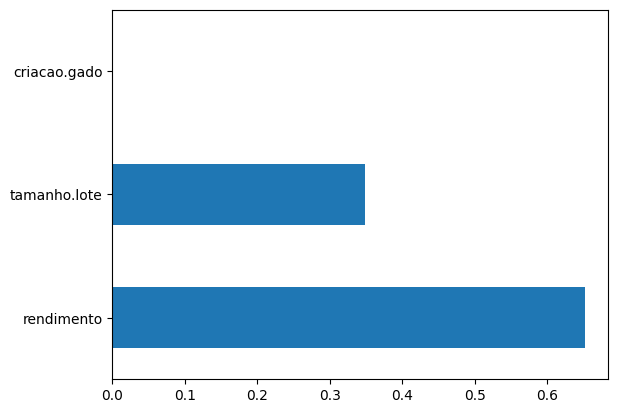

In [21]:
feat_importances = pd.Series(modelo.feature_importances_, index=features)
feat_importances.nlargest(3).plot(kind='barh')

# **Fitando os valores do modelo**

Perceba que o modelo solta uma classificação

In [25]:
y_pred = modelo.predict(X) # Calculando de uma base qualquer
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1])

In [28]:
df['y_pred'] = y_pred

**Matrix de confusão para a Predição**

In [29]:
confusion_matrix(y, df['y_pred'])

array([[12,  0],
       [ 0, 12]])

**Acurácia do modelo**

In [30]:
acuracia = accuracy_score(y, df['y_pred'])
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 1.0000 de acurácia.
